# **WINE QUALITY PREDICTION**


##**Team Members:**
* Chaitanya N USN:1RVU22BSC017
*Rakshitha.M  USN:1RVU22BSC079

#Data Pre-Processing

In [ ]:
import pandas as pd
df=pd.read_csv("WineQT.csv")
df.head(5)
# Reading the dataset

: 

In [ ]:
df.info()
#getting the overall information from the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.drop('Id',axis=1,inplace=True)
# droping id column as  it is not important

In [ ]:
df.tail(5)
#Verifying after the drop

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


**1.0 Handling Null Values**

In [ ]:
df.isna().sum()/len(df)*100
# there is no null value

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

**1.1 Handling duplicates**

In [ ]:
df.duplicated().sum()
# checking for duplicates

125

In [ ]:
df1=df.drop_duplicates()
# removing of duplicates

In [ ]:
df1
#verifying

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [ ]:
df1.duplicated().sum()
#cross checking for duplicates

0

In [ ]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**1.2 Class Distribution Analysis**

In [ ]:
count=df1['quality'].value_counts()
print(count)
# checking for data balanced or imbalanced
#its a imblanced dataset

quality
5    433
6    409
7    122
4     33
8     15
3      6
Name: count, dtype: int64


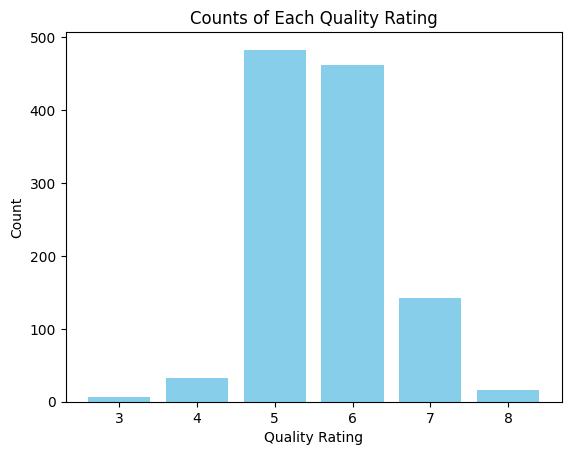

In [ ]:
import matplotlib.pyplot as plt

# Define the quality ratings and their corresponding counts
quality_ratings = [3, 4, 5, 6, 7, 8]
counts = [6, 33, 483, 462, 143, 16]

# Create a bar plot
plt.bar(quality_ratings, counts, color='skyblue')

# Add labels and title
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.title('Counts of Each Quality Rating')

# Show plot
plt.show()
# visualising quality column

In [ ]:
df1['qualitycheck'] = [1 if x >= 7 else 0 for x in df1['quality']]# grouping good quality and bad quality
# less  than 7 is considered as bad quality and is donated by constant 0 like vise  greater than 7 is considered as 1 that is good quality

<ipython-input-13-54d009df383e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['qualitycheck'] = [1 if x >= 7 else 0 for x in df1['quality']]# Separate feature variables and target variable


In [ ]:
df1['qualitycheck'].value_counts()
#adding column to the row

qualitycheck
0    881
1    137
Name: count, dtype: int64

In [ ]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualitycheck
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0


**1.3 Data Analysis**

In [ ]:
# Calculate correlation coefficients between numeric features and label
correlation_matrix = df1.corr()
correlation_with_label = correlation_matrix['quality'].sort_values(ascending=False)
print("Correlation with Label (quality):")
print(correlation_with_label)


Correlation with Label (quality):
quality                 1.000000
qualitycheck            0.713515
alcohol                 0.485953
sulphates               0.257519
citric acid             0.241565
fixed acidity           0.115826
residual sugar          0.022718
pH                     -0.057592
free sulfur dioxide    -0.071083
chlorides              -0.122214
total sulfur dioxide   -0.182214
density                -0.185187
volatile acidity       -0.409340
Name: quality, dtype: float64


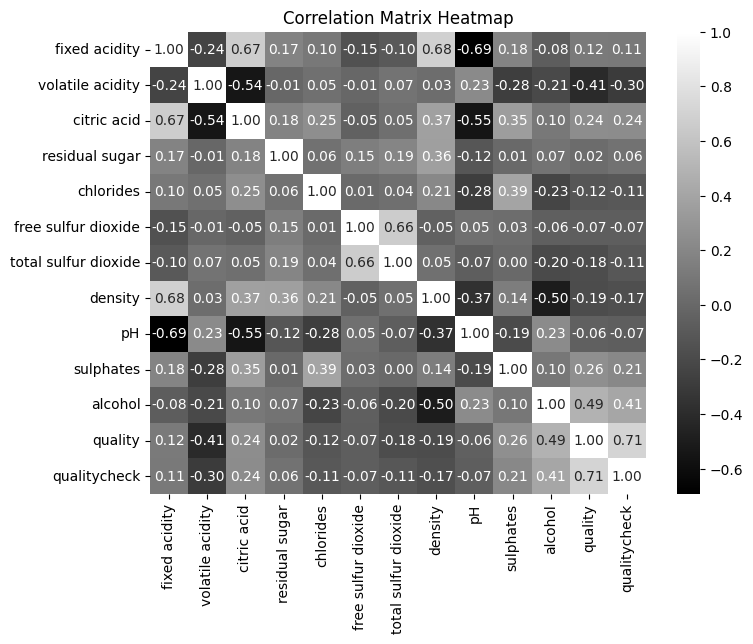

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate correlation matrix
correlation_matrix = df1.corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='gray', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**1.4 Outlier Detection**

fixed acidity              Axes(0.125,0.712609;0.133621x0.167391)
volatile acidity        Axes(0.285345,0.712609;0.133621x0.167391)
citric acid              Axes(0.44569,0.712609;0.133621x0.167391)
residual sugar          Axes(0.606034,0.712609;0.133621x0.167391)
chlorides               Axes(0.766379,0.712609;0.133621x0.167391)
free sulfur dioxide        Axes(0.125,0.511739;0.133621x0.167391)
total sulfur dioxide    Axes(0.285345,0.511739;0.133621x0.167391)
density                  Axes(0.44569,0.511739;0.133621x0.167391)
pH                      Axes(0.606034,0.511739;0.133621x0.167391)
sulphates               Axes(0.766379,0.511739;0.133621x0.167391)
alcohol                     Axes(0.125,0.31087;0.133621x0.167391)
quality                  Axes(0.285345,0.31087;0.133621x0.167391)
qualitycheck              Axes(0.44569,0.31087;0.133621x0.167391)
dtype: object

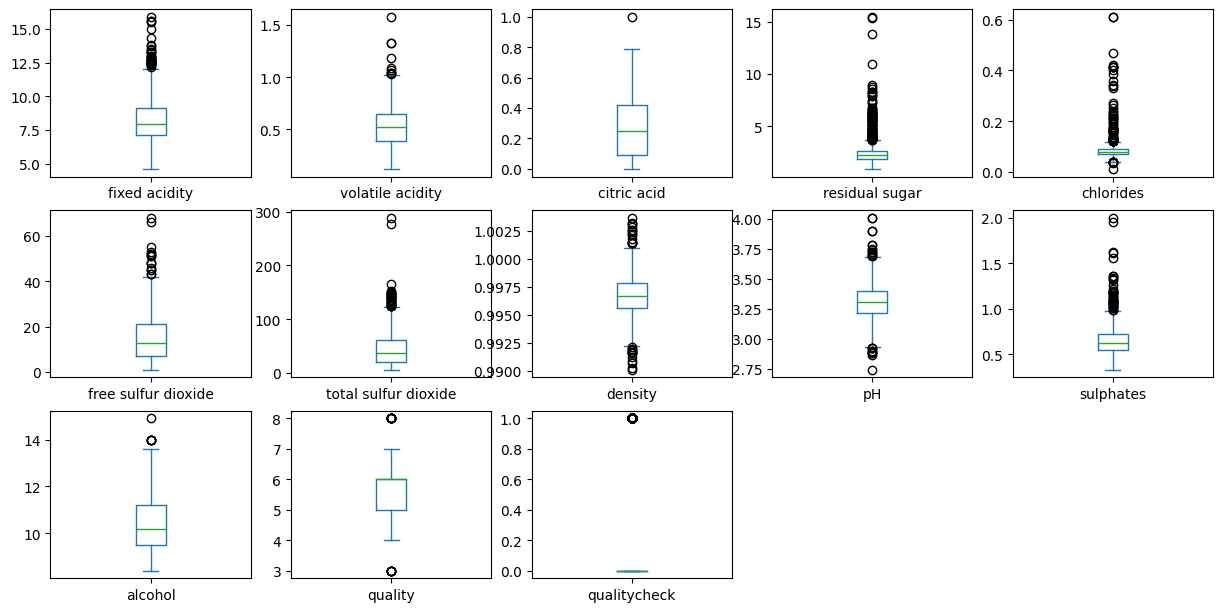

In [ ]:
df1.plot(kind='box', subplots=True, layout=(4, 5), sharex=False, figsize=(15, 10))
#visualizing outliers

**1.5 Data Splitting**

In [ ]:
features=[
    'alcohol',
    'sulphates',
    'citric acid',
    'fixed acidity',
    'residual sugar',
     'pH',
    'free sulfur dioxide',
    'chlorides',
    'total sulfur dioxide',
    'density',
    'volatile acidity'
]
print("Selected features:",features)
#getting the features into 1 variable

Selected features: ['alcohol', 'sulphates', 'citric acid', 'fixed acidity', 'residual sugar', 'pH', 'free sulfur dioxide', 'chlorides', 'total sulfur dioxide', 'density', 'volatile acidity']


In [ ]:
X = df1[features]
y = df1.iloc[::,-1]
# x is independent variables
# y is depeendent variable

In [ ]:
print(X)
#verifying the values of x

      alcohol  sulphates  citric acid  fixed acidity  residual sugar    pH  \
0         9.4       0.56         0.00            7.4             1.9  3.51   
1         9.8       0.68         0.00            7.8             2.6  3.20   
2         9.8       0.65         0.04            7.8             2.3  3.26   
3         9.8       0.58         0.56           11.2             1.9  3.16   
5         9.4       0.56         0.00            7.4             1.8  3.51   
...       ...        ...          ...            ...             ...   ...   
1138     11.0       0.75         0.13            6.3             2.3  3.42   
1139      9.5       0.82         0.08            6.8             1.9  3.42   
1140     10.5       0.58         0.08            6.2             2.0  3.45   
1141     11.2       0.76         0.10            5.9             2.2  3.52   
1142     10.2       0.71         0.12            5.9             2.0  3.57   

      free sulfur dioxide  chlorides  total sulfur dioxide  den

In [ ]:
print(y)
#verifying the values of y

0       0
1       0
2       0
3       0
5       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: qualitycheck, Length: 1018, dtype: int64


**1.6 Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard_data = standard.fit_transform(X)
standard_df = pd.DataFrame(standard_data, columns=X.columns)
standard_df
# used standard scaler and converted it into 0 to 1

,alcohol,sulphates,citric acid,fixed acidity,residual sugar,pH,free sulfur dioxide,chlorides,total sulfur dioxide,density,volatile acidity
0,-0.961563,-0.578153,-1.370507,-0.510499,-0.475125,1.258719,-0.457043,-0.230739,-0.372294,0.574517,0.909227
1,-0.596108,0.138438,-1.370507,-0.280676,0.057517,-0.707068,0.919349,0.223040,0.624466,0.052448,1.892418
2,-0.596108,-0.040710,-1.166564,-0.280676,-0.170758,-0.326593,-0.063788,0.099282,0.231803,0.156862,1.236957
3,-0.596108,-0.458721,1.484700,1.672822,-0.475125,-0.960718,0.132839,-0.251365,0.413032,0.678931,-1.384886
4,-0.961563,-0.578153,-1.370507,-0.510499,-0.551216,1.258719,-0.260415,-0.251365,-0.191065,0.574517,0.690740
...,...,...,...,...,...,...,...,...,...,...,...
1013,0.500257,0.556449,-0.707691,-1.142513,-0.170758,0.688007,1.312603,-0.230739,-0.191065,-0.500945,-0.128586
1014,-0.870199,0.974460,-0.962621,-0.855234,-0.475125,0.688007,1.214290,-0.395749,-0.251475,-0.098952,0.472253
1015,0.043438,-0.458721,-0.962621,-1.199968,-0.399033,0.878244,1.607544,0.058029,-0.070246,-0.939483,0.363009
1016,0.682984,0.616165,-0.860649,-1.372336,-0.246849,1.322131,2.295740,-0.519507,0.141188,-0.824628,0.089901


#Model Deployment

**2.0 Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)

lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy = lr.score(X_test, y_test)
print("Accuracy:", accuracy)
#In Logistic Regression the data was  split into 70% training and 30% testing.

Accuracy: 0.8660130718954249


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy is 86%

**2.1 KNN**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 20)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc)
#In KNN the dataset was  split into 70% training and 30% testing.

Confusion Matrix:
[[263   0]
 [ 42   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       263
           1       1.00      0.02      0.05        43

    accuracy                           0.86       306
   macro avg       0.93      0.51      0.49       306
weighted avg       0.88      0.86      0.80       306


Accuracy: 0.8627450980392157


Accuracy is 86%

**2.2 Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 40, min_samples_leaf=25) # criterion = 'entropy'
# The maximum depth of the tree.
# If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# The minimum number of samples required to be at a leaf node.
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=40, min_samples_leaf=25)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred)
print("\nAccuracy:",acc)

Confusion Matrix:
[[254   9]
 [ 28  15]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       263
           1       0.62      0.35      0.45        43

    accuracy                           0.88       306
   macro avg       0.76      0.66      0.69       306
weighted avg       0.86      0.88      0.86       306


Accuracy: 0.8790849673202614


Accuracy is 87%

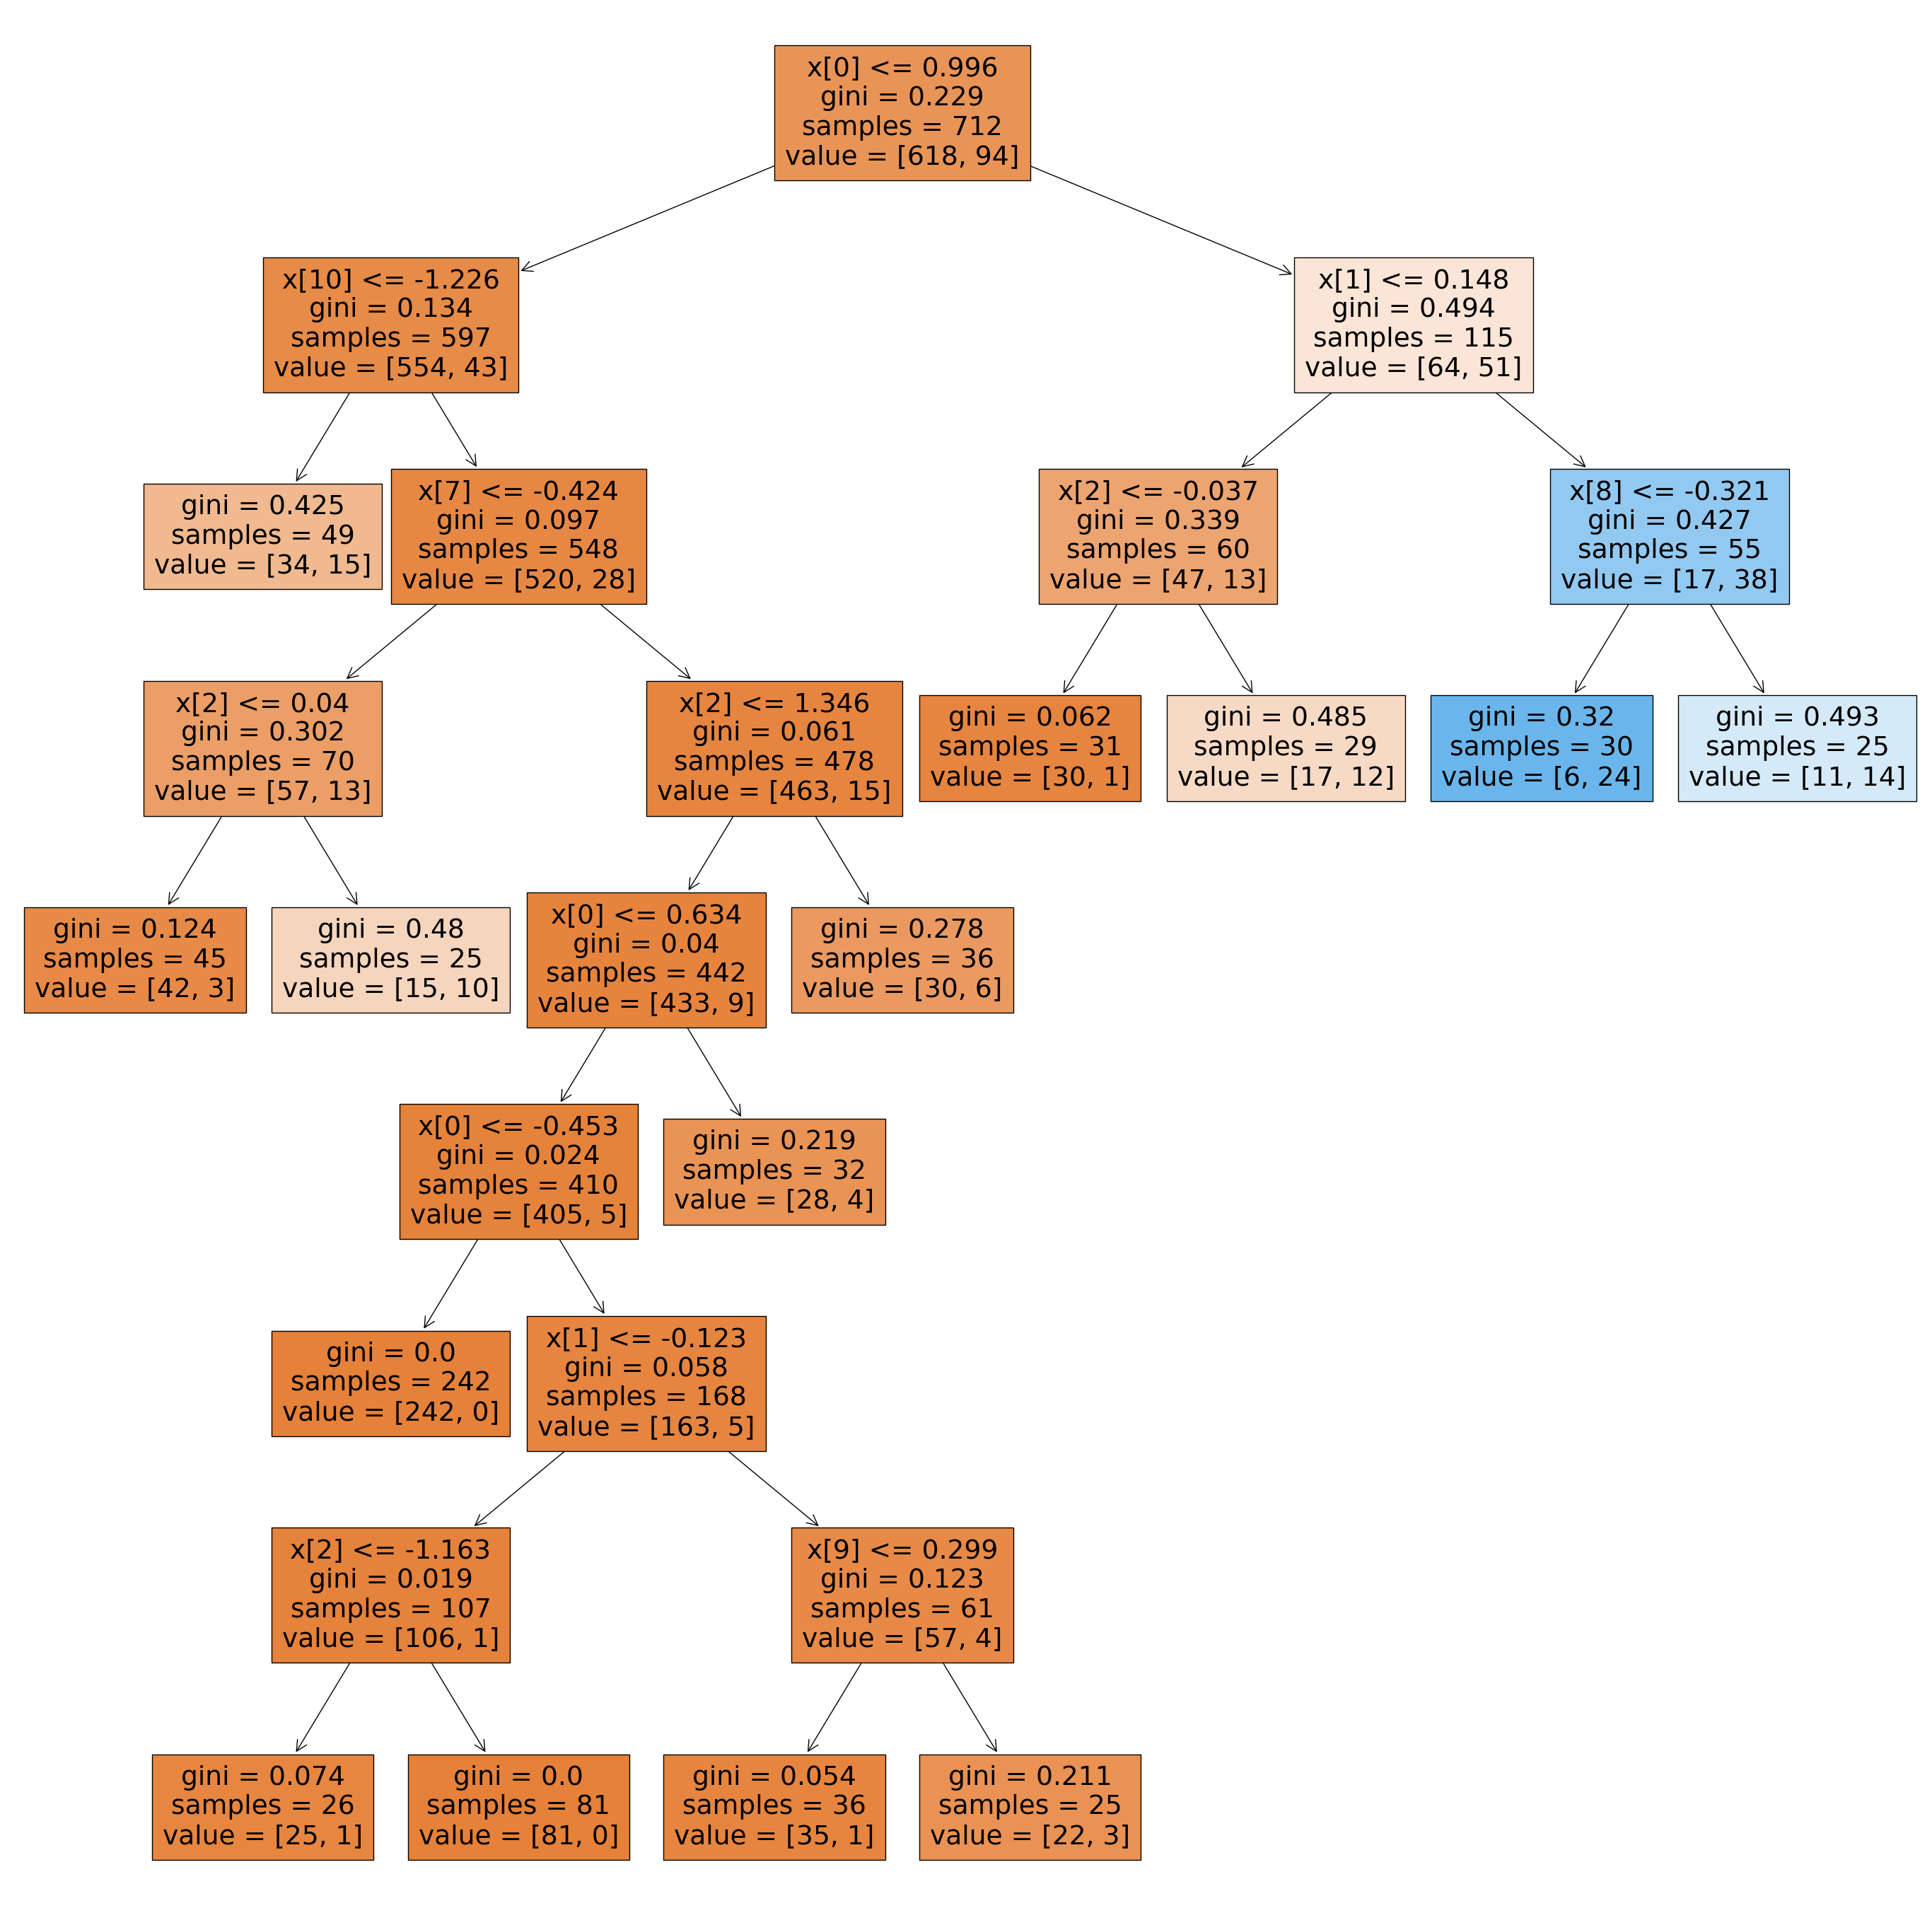

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(35,35))
tree.plot_tree(dt,filled=True)
plt.show()

**2.3 Considering Entropy as Decision Factor**

In [ ]:
dt1 = DecisionTreeClassifier(max_depth = 40,min_samples_leaf=25, criterion = 'entropy')
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40, min_samples_leaf=25)

In [ ]:
y_pred1 = dt1.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred1)
print("\nClassification Report:",)
print (cr)
acc = accuracy_score(y_test,y_pred1)
print("\nAccuracy:",acc)

Confusion Matrix:
[[243  20]
 [ 26  17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       263
           1       0.46      0.40      0.42        43

    accuracy                           0.85       306
   macro avg       0.68      0.66      0.67       306
weighted avg       0.84      0.85      0.84       306


Accuracy: 0.8496732026143791


Accuracy is 84%

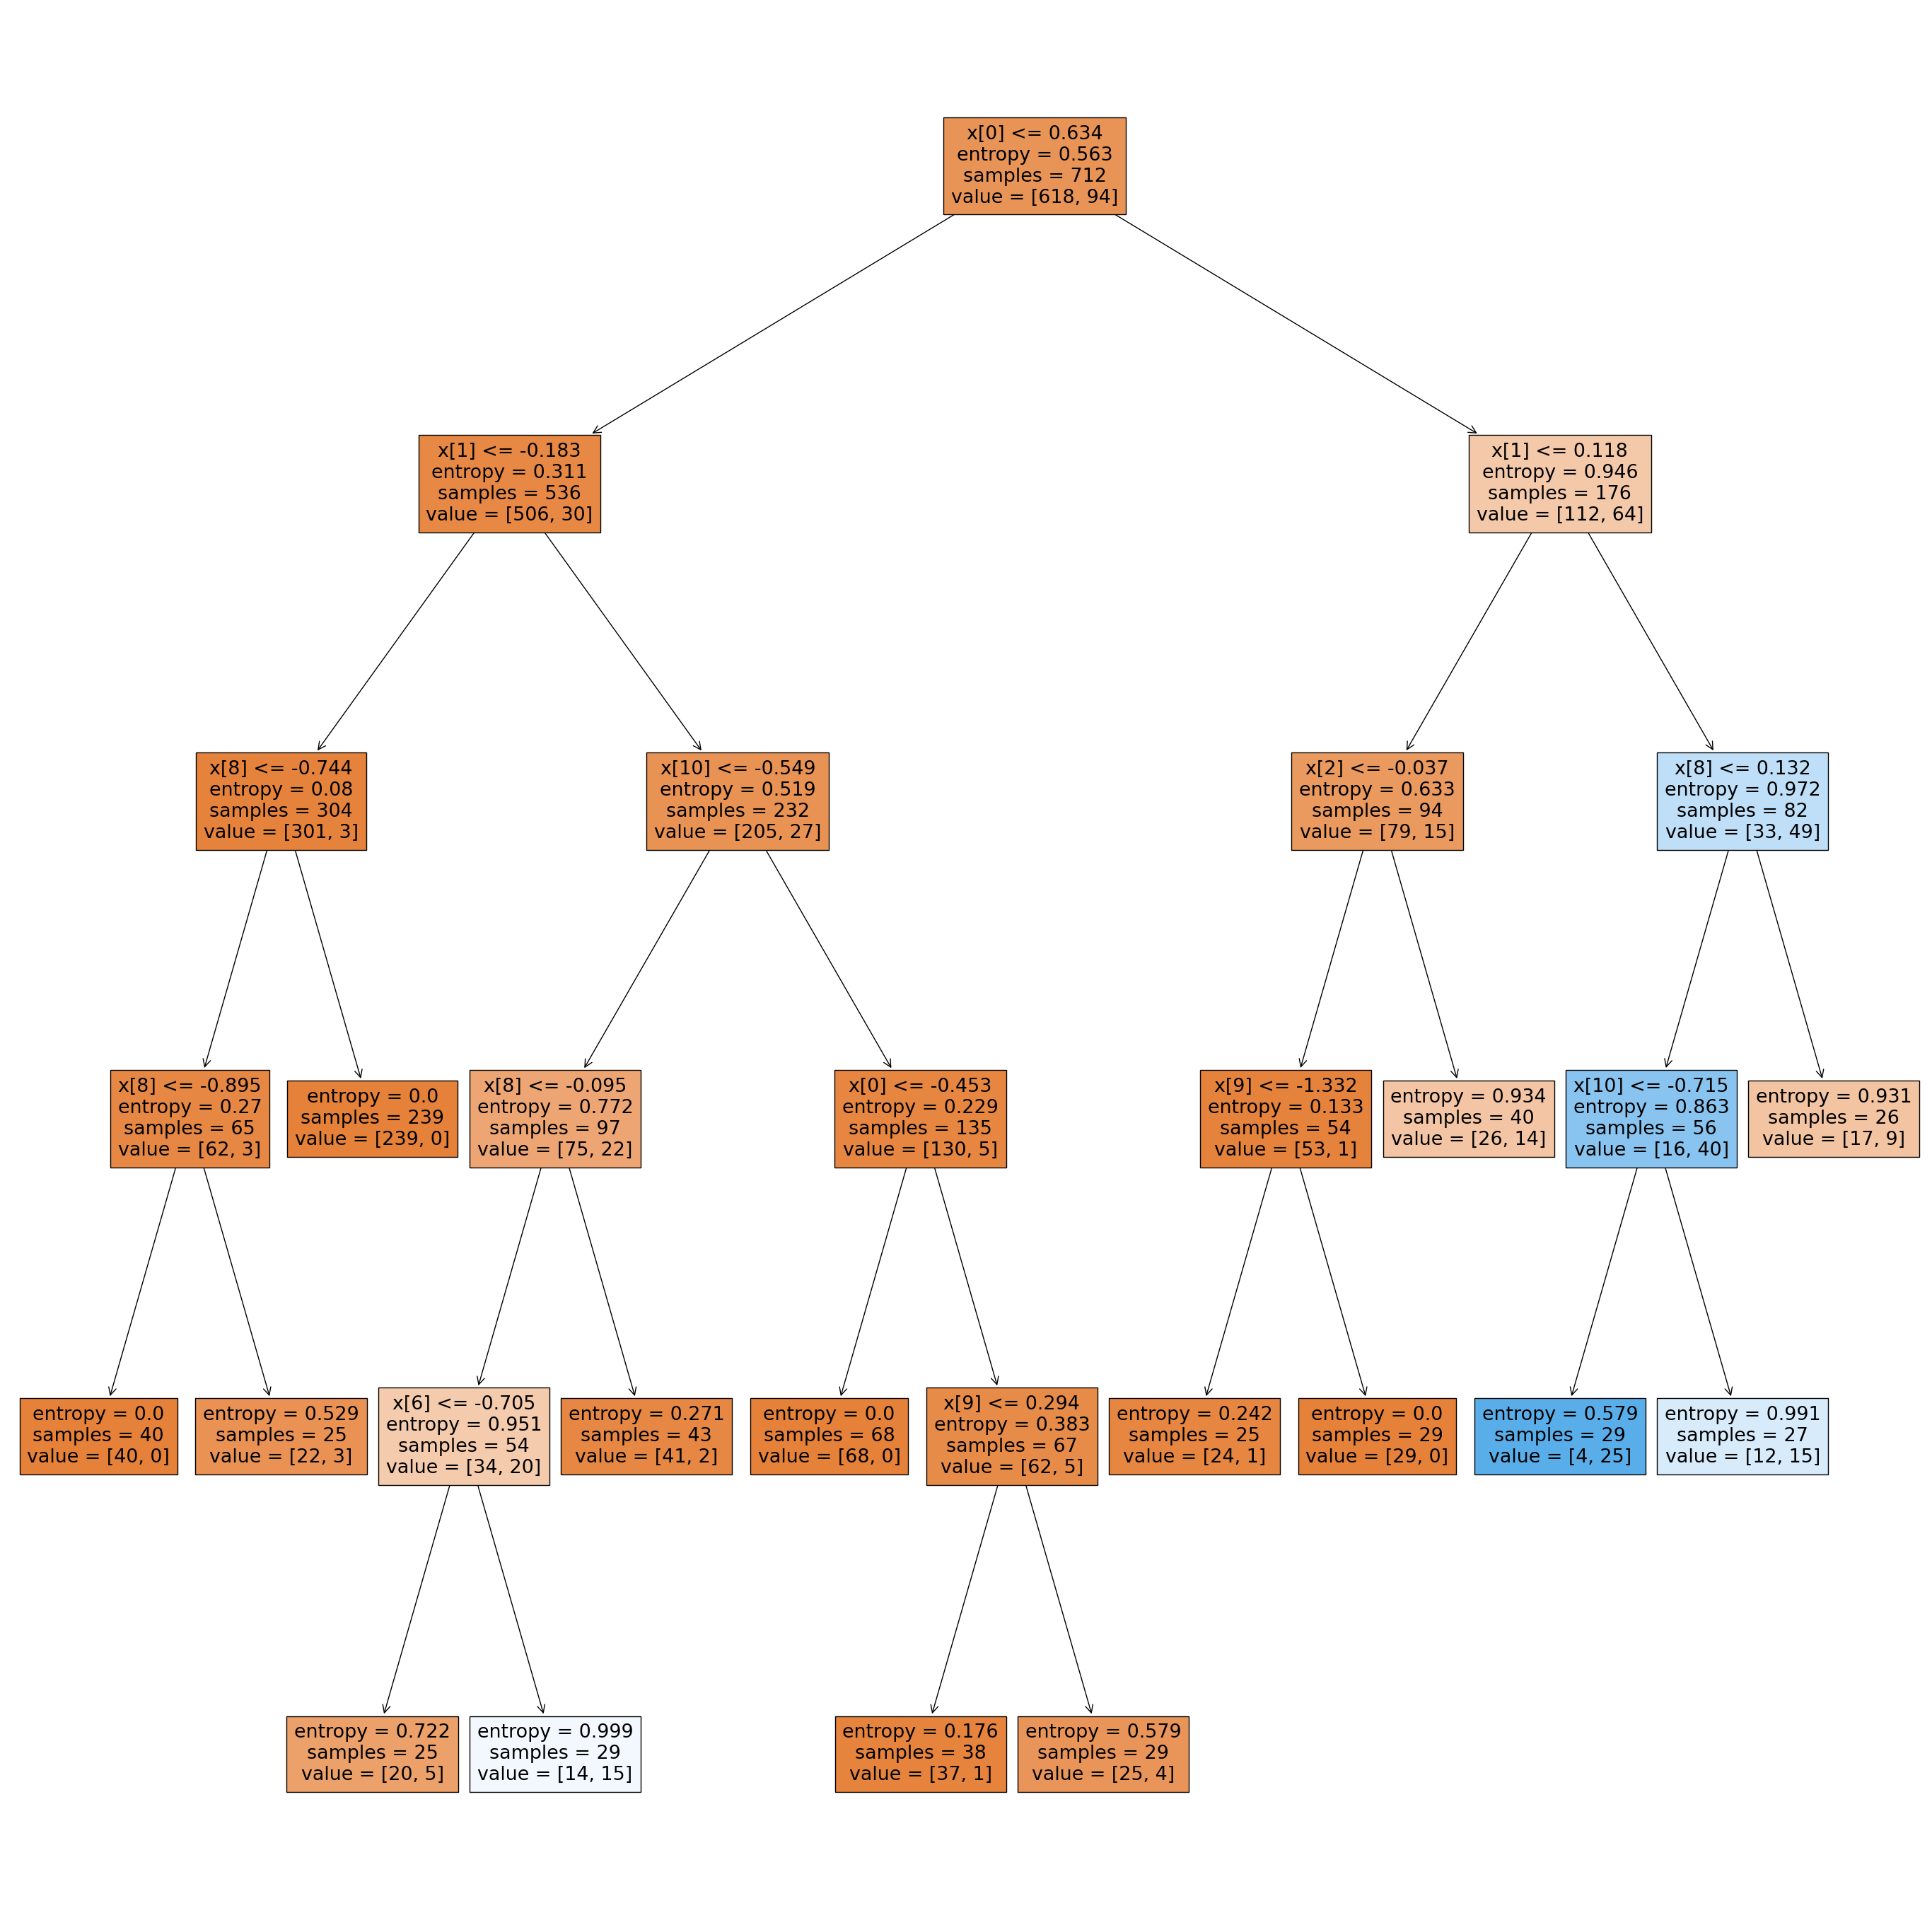

In [ ]:
plt.figure(figsize=(35,35))
tree.plot_tree(dt1,filled=True)
plt.show()

#Hyperparameter Tuning

**2.4 Random Forset**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Modelling
# Random forest Classifier
clf = RandomForestClassifier(n_estimators = 40) # Random Forest with 20 trees

clf.fit(X, y) # It can only handle numerical attributes!

RandomForestClassifier(n_estimators=40)

In [ ]:
# Model Evaluation
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       279
           1       0.44      0.70      0.54        27

    accuracy                           0.90       306
   macro avg       0.71      0.81      0.74       306
weighted avg       0.92      0.90      0.91       306



Accuracy is 90%

# **Summary**


---
## Introduction
The development of a machine learning-based wine quality prediction model is an essential tool for winemakers, providing precise estimates of wine quality based on its physical and chemical characteristics. In addition to helping to comprehend the factors influencing wine quality, this predictive framework assures consistency, makes informed decisions easier, and promotes ongoing improvement in wine production. This method, which makes use of statistical and machine learning tools, gives producers insightful knowledge about the complex interactions that influence wine quality, enabling them to improve their workflows and produce wines that reach new levels of quality.

Dataset consist of 1143 rows 13 column

---

##Data Pre-Processing

The 'Id' column, deemed unimportant, was dropped from the dataset.

* 1.0  *Handling Null Values*
      
    No Null Value

* 1.2  *Handling duplicates*

    It had 125 duplicates removed the duplicate
        
    After handling duplicates data consist of 1018 rows 12 column
        

* 1.3 *Data Analysis*

    Verified whether the data is imbalanced or balanced. Discovered that the dataset was unbalanced.  Multi-Classification was then converted from Binary Classification. A binary classification system was implemented in the quality column due to the imbalance in classes; ratings below 7 were labeled as 0 (indicating not good quality), and ratings above 7 were labeled as 1 (indicating good quality).

* 1.4 *Data Analysis*

    Utilized visualization techniques such as heatmap for correlation coefficients analysis
    
*  1.5 *Outlier Detection*
    
    Box plots are used to identify outliers that might have an impact on the performance of the model.

* 1.6 *Data Splitting*

    Split the dataset into feature variables (X) and target variable (y), where X comprises the independent variables representing the physicochemical properties of wines, and y represents the dependent variable, which is the wine quality.

* 1.7 *Feature Scaling*

    Applied standard scaling to normalize the feature values within a range of 0 to 1. This step ensures that all features contribute equally to the model training process and prevents any single feature from dominating due to its larger magnitude.


---

## Model Deployment

* 2.0 *Logistic Regression*

    The 100% of the data was divided into 30% for testing and 70% for training.
      Accuracy of 86% was obtained.

* 2.1 *KNN*

    70% of the 100% of the data was split up for training and 30% for testing. Count the 20 closest neighbors.
      Attained an 86% accuracy rate

* 2.2 *Decision Tree*

    The 100% of the data was divided into 30% for testing and 70% for training.Taking into consideration max_depth=40 and min_samples_leaf=25.
      Obtained 87% accuracy

  * 2.3 *Entropy as Decision Factor*

        Accuracy dropped slightly to 85%.

## Hyperparameter Tuning

* 2.4 *Random Forset*

    In 100% of data was splited the data into 70% training and 30% testing.Training the model 42 times(running 42 time). Considering 40 Decision Tree.
      Achieved an accuracy of 90%
---
##Conclusion

Data-driven models such as Logistic Regression, Decision Tree, KNN, and Random Forest help winemakers show critical physicochemical components of quality wines. Preprocessing corrects for nulls, outliers, and duplicates; transforming unbalanced data improves accuracy. Equitable feature contributions are ensured by feature scaling. With 90% accuracy, Random Forest performs best, followed by Decision Tree at 87%. KNN and logistic regression do somewhat worse, at 86%. Random Forest performs better when its hyperparameters are adjusted, demonstrating how predictive modeling can improve the evaluation of wine quality.